In [1]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [2]:
landmarks_frame = pd.read_csv('DITS-full\DITS-full\DITS-detection\class\classes.csv')

n = 1
img_name = 'DITS-full\DITS-full\DITS-detection\class\image\\'+landmarks_frame.iloc[0, 0]
landmarks = landmarks_frame.iloc[n, 1]

print('Image name: {}'.format(img_name))
print('Type: {}'.format(landmarks))


Image name: DITS-full\DITS-full\DITS-detection\class\image\0.png
Type: 0


In [3]:
class StreetSignDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform):
        """
        Arguments:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        
        # Carica le landmarks come array NumPy e assicurati che abbiano sempre dimensioni consistenti
        landmarks = np.array(str(self.landmarks_frame.iloc[idx, 1]).split(), dtype=np.float32)

        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [4]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        return {'image': img, 'landmarks': landmarks}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h + 1)
        left = np.random.randint(0, w - new_w + 1)

        image = image[top: top + new_h,
                      left: left + new_w]

        return {'image': image, 'landmarks': landmarks}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W
        image = image.transpose((2, 0, 1))
        landmarks = np.array(landmarks, dtype=np.float32)  # Converti landmarks in un array NumPy
        
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}

In [5]:
tran= transforms.Compose([Rescale(256),RandomCrop(224),ToTensor()])

In [9]:
sign_dataset = StreetSignDataset('DITS-full\DITS-full\DITS-detection\class\classes.csv','DITS-full\DITS-full\DITS-detection\class\image',tran)

fig = plt.figure()

for i, sample in enumerate(sign_dataset):
    print(i, sample['image'].size(), sample['landmarks'])

0 torch.Size([3, 224, 224]) tensor([0.])
1 torch.Size([3, 224, 224]) tensor([0.])
2 torch.Size([3, 224, 224]) tensor([0.])
3 torch.Size([3, 224, 224]) tensor([0.])
4 torch.Size([3, 224, 224]) tensor([0.])
5 torch.Size([3, 224, 224]) tensor([0.])
6 torch.Size([3, 224, 224]) tensor([0.])
7 torch.Size([3, 224, 224]) tensor([0.])
8 torch.Size([3, 224, 224]) tensor([0.])
9 torch.Size([3, 224, 224]) tensor([0.])
10 torch.Size([3, 224, 224]) tensor([0.])
11 torch.Size([3, 224, 224]) tensor([0.])
12 torch.Size([3, 224, 224]) tensor([0.])
13 torch.Size([3, 224, 224]) tensor([0.])
14 torch.Size([3, 224, 224]) tensor([0.])
15 torch.Size([3, 224, 224]) tensor([0.])
16 torch.Size([3, 224, 224]) tensor([0.])
17 torch.Size([3, 224, 224]) tensor([0.])
18 torch.Size([3, 224, 224]) tensor([0.])
19 torch.Size([3, 224, 224]) tensor([0.])
20 torch.Size([3, 224, 224]) tensor([0.])
21 torch.Size([3, 224, 224]) tensor([0.])
22 torch.Size([3, 224, 224]) tensor([0.])
23 torch.Size([3, 224, 224]) tensor([0.])
24

198 torch.Size([3, 224, 224]) tensor([0.])
199 torch.Size([3, 224, 224]) tensor([0.])
200 torch.Size([3, 224, 224]) tensor([0.])
201 torch.Size([3, 224, 224]) tensor([0.])
202 torch.Size([3, 224, 224]) tensor([0.])
203 torch.Size([3, 224, 224]) tensor([0.])
204 torch.Size([3, 224, 224]) tensor([0.])
205 torch.Size([3, 224, 224]) tensor([0.])
206 torch.Size([3, 224, 224]) tensor([0.])
207 torch.Size([3, 224, 224]) tensor([0.])
208 torch.Size([3, 224, 224]) tensor([0.])
209 torch.Size([3, 224, 224]) tensor([0.])
210 torch.Size([3, 224, 224]) tensor([0.])
211 torch.Size([3, 224, 224]) tensor([0.])
212 torch.Size([3, 224, 224]) tensor([0.])
213 torch.Size([3, 224, 224]) tensor([0.])
214 torch.Size([3, 224, 224]) tensor([0.])
215 torch.Size([3, 224, 224]) tensor([0.])
216 torch.Size([3, 224, 224]) tensor([0.])
217 torch.Size([3, 224, 224]) tensor([0.])
218 torch.Size([3, 224, 224]) tensor([0.])
219 torch.Size([3, 224, 224]) tensor([0.])
220 torch.Size([3, 224, 224]) tensor([0.])
221 torch.S

393 torch.Size([3, 224, 224]) tensor([1.])
394 torch.Size([3, 224, 224]) tensor([1.])
395 torch.Size([3, 224, 224]) tensor([1.])
396 torch.Size([3, 224, 224]) tensor([1.])
397 torch.Size([3, 224, 224]) tensor([1.])
398 torch.Size([3, 224, 224]) tensor([1.])
399 torch.Size([3, 224, 224]) tensor([1.])
400 torch.Size([3, 224, 224]) tensor([1.])
401 torch.Size([3, 224, 224]) tensor([1.])
402 torch.Size([3, 224, 224]) tensor([1.])
403 torch.Size([3, 224, 224]) tensor([1.])
404 torch.Size([3, 224, 224]) tensor([1.])
405 torch.Size([3, 224, 224]) tensor([1.])
406 torch.Size([3, 224, 224]) tensor([1.])
407 torch.Size([3, 224, 224]) tensor([1.])
408 torch.Size([3, 224, 224]) tensor([1.])
409 torch.Size([3, 224, 224]) tensor([1.])
410 torch.Size([3, 224, 224]) tensor([1.])
411 torch.Size([3, 224, 224]) tensor([1.])
412 torch.Size([3, 224, 224]) tensor([1.])
413 torch.Size([3, 224, 224]) tensor([1.])
414 torch.Size([3, 224, 224]) tensor([1.])
415 torch.Size([3, 224, 224]) tensor([1.])
416 torch.S

588 torch.Size([3, 224, 224]) tensor([1.])
589 torch.Size([3, 224, 224]) tensor([1.])
590 torch.Size([3, 224, 224]) tensor([1.])
591 torch.Size([3, 224, 224]) tensor([1.])
592 torch.Size([3, 224, 224]) tensor([1.])
593 torch.Size([3, 224, 224]) tensor([1.])
594 torch.Size([3, 224, 224]) tensor([1.])
595 torch.Size([3, 224, 224]) tensor([1.])
596 torch.Size([3, 224, 224]) tensor([1.])
597 torch.Size([3, 224, 224]) tensor([1.])
598 torch.Size([3, 224, 224]) tensor([1.])
599 torch.Size([3, 224, 224]) tensor([1.])
600 torch.Size([3, 224, 224]) tensor([1.])
601 torch.Size([3, 224, 224]) tensor([1.])
602 torch.Size([3, 224, 224]) tensor([1.])
603 torch.Size([3, 224, 224]) tensor([1.])
604 torch.Size([3, 224, 224]) tensor([1.])
605 torch.Size([3, 224, 224]) tensor([1.])
606 torch.Size([3, 224, 224]) tensor([1.])
607 torch.Size([3, 224, 224]) tensor([1.])
608 torch.Size([3, 224, 224]) tensor([1.])
609 torch.Size([3, 224, 224]) tensor([1.])
610 torch.Size([3, 224, 224]) tensor([1.])
611 torch.S

780 torch.Size([3, 224, 224]) tensor([1.])
781 torch.Size([3, 224, 224]) tensor([1.])
782 torch.Size([3, 224, 224]) tensor([1.])
783 torch.Size([3, 224, 224]) tensor([1.])
784 torch.Size([3, 224, 224]) tensor([1.])
785 torch.Size([3, 224, 224]) tensor([1.])
786 torch.Size([3, 224, 224]) tensor([1.])
787 torch.Size([3, 224, 224]) tensor([1.])
788 torch.Size([3, 224, 224]) tensor([1.])
789 torch.Size([3, 224, 224]) tensor([1.])
790 torch.Size([3, 224, 224]) tensor([1.])
791 torch.Size([3, 224, 224]) tensor([1.])
792 torch.Size([3, 224, 224]) tensor([1.])
793 torch.Size([3, 224, 224]) tensor([1.])
794 torch.Size([3, 224, 224]) tensor([1.])
795 torch.Size([3, 224, 224]) tensor([1.])
796 torch.Size([3, 224, 224]) tensor([1.])
797 torch.Size([3, 224, 224]) tensor([1.])
798 torch.Size([3, 224, 224]) tensor([1.])
799 torch.Size([3, 224, 224]) tensor([1.])
800 torch.Size([3, 224, 224]) tensor([1.])
801 torch.Size([3, 224, 224]) tensor([1.])
802 torch.Size([3, 224, 224]) tensor([1.])
803 torch.S

976 torch.Size([3, 224, 224]) tensor([1.])
977 torch.Size([3, 224, 224]) tensor([1.])
978 torch.Size([3, 224, 224]) tensor([1.])
979 torch.Size([3, 224, 224]) tensor([1.])
980 torch.Size([3, 224, 224]) tensor([1.])
981 torch.Size([3, 224, 224]) tensor([1.])
982 torch.Size([3, 224, 224]) tensor([1.])
983 torch.Size([3, 224, 224]) tensor([1.])
984 torch.Size([3, 224, 224]) tensor([1.])
985 torch.Size([3, 224, 224]) tensor([1.])
986 torch.Size([3, 224, 224]) tensor([1.])
987 torch.Size([3, 224, 224]) tensor([1.])
988 torch.Size([3, 224, 224]) tensor([1.])
989 torch.Size([3, 224, 224]) tensor([1.])
990 torch.Size([3, 224, 224]) tensor([1.])
991 torch.Size([3, 224, 224]) tensor([1.])
992 torch.Size([3, 224, 224]) tensor([1.])
993 torch.Size([3, 224, 224]) tensor([1.])
994 torch.Size([3, 224, 224]) tensor([1.])
995 torch.Size([3, 224, 224]) tensor([1.])
996 torch.Size([3, 224, 224]) tensor([1.])
997 torch.Size([3, 224, 224]) tensor([1.])
998 torch.Size([3, 224, 224]) tensor([1.])
999 torch.S

1168 torch.Size([3, 224, 224]) tensor([2.])
1169 torch.Size([3, 224, 224]) tensor([2.])
1170 torch.Size([3, 224, 224]) tensor([2.])
1171 torch.Size([3, 224, 224]) tensor([2.])
1172 torch.Size([3, 224, 224]) tensor([2.])
1173 torch.Size([3, 224, 224]) tensor([2.])
1174 torch.Size([3, 224, 224]) tensor([2.])
1175 torch.Size([3, 224, 224]) tensor([2.])
1176 torch.Size([3, 224, 224]) tensor([2.])
1177 torch.Size([3, 224, 224]) tensor([2.])
1178 torch.Size([3, 224, 224]) tensor([2.])
1179 torch.Size([3, 224, 224]) tensor([2.])
1180 torch.Size([3, 224, 224]) tensor([2.])
1181 torch.Size([3, 224, 224]) tensor([2.])
1182 torch.Size([3, 224, 224]) tensor([2.])
1183 torch.Size([3, 224, 224]) tensor([2.])
1184 torch.Size([3, 224, 224]) tensor([2.])
1185 torch.Size([3, 224, 224]) tensor([2.])
1186 torch.Size([3, 224, 224]) tensor([2.])
1187 torch.Size([3, 224, 224]) tensor([2.])
1188 torch.Size([3, 224, 224]) tensor([2.])
1189 torch.Size([3, 224, 224]) tensor([2.])
1190 torch.Size([3, 224, 224]) t

1358 torch.Size([3, 224, 224]) tensor([2.])
1359 torch.Size([3, 224, 224]) tensor([2.])
1360 torch.Size([3, 224, 224]) tensor([2.])
1361 torch.Size([3, 224, 224]) tensor([2.])
1362 torch.Size([3, 224, 224]) tensor([2.])
1363 torch.Size([3, 224, 224]) tensor([2.])
1364 torch.Size([3, 224, 224]) tensor([2.])
1365 torch.Size([3, 224, 224]) tensor([2.])
1366 torch.Size([3, 224, 224]) tensor([2.])
1367 torch.Size([3, 224, 224]) tensor([2.])
1368 torch.Size([3, 224, 224]) tensor([2.])
1369 torch.Size([3, 224, 224]) tensor([2.])
1370 torch.Size([3, 224, 224]) tensor([2.])
1371 torch.Size([3, 224, 224]) tensor([2.])
1372 torch.Size([3, 224, 224]) tensor([2.])
1373 torch.Size([3, 224, 224]) tensor([2.])
1374 torch.Size([3, 224, 224]) tensor([2.])
1375 torch.Size([3, 224, 224]) tensor([2.])
1376 torch.Size([3, 224, 224]) tensor([2.])
1377 torch.Size([3, 224, 224]) tensor([2.])
1378 torch.Size([3, 224, 224]) tensor([2.])
1379 torch.Size([3, 224, 224]) tensor([2.])
1380 torch.Size([3, 224, 224]) t

<Figure size 640x480 with 0 Axes>

0 torch.Size([4, 3, 224, 224]) torch.Size([4, 1])
1 torch.Size([4, 3, 224, 224]) torch.Size([4, 1])
2 torch.Size([4, 3, 224, 224]) torch.Size([4, 1])
3 torch.Size([4, 3, 224, 224]) torch.Size([4, 1])
Landmarks shape for sample 0: torch.Size([1])


RuntimeError: shape '[-1, 2]' is invalid for input of size 1

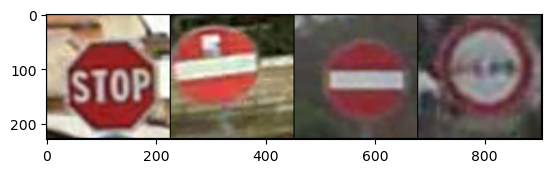

In [7]:
dataloader = DataLoader(sign_dataset, batch_size=4,
                        shuffle=True, num_workers=0)


# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = \
        sample_batched['image'], sample_batched['landmarks']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    grid_border_size = 2

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

    for i in range(batch_size):
        print(f"Landmarks shape for sample {i}: {landmarks_batch[i].shape}")
        landmarks = landmarks_batch[i].view(-1, 2)  # Reshape per renderli bidimensionali
        print(f"Reshaped landmarks shape for sample {i}: {landmarks.shape}")
        plt.scatter(landmarks[:, 0].numpy() + i * im_size + (i + 1) * grid_border_size,
                    landmarks[:, 1].numpy() + grid_border_size,
                    s=10, marker='.', c='r')

    plt.title('Batch from dataloader')


# if you are using Windows, uncomment the next line and indent the for loop.
# you might need to go back and change ``num_workers`` to 0.

# if __name__ == '__main__':
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['landmarks'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break